### Salary Prediction
Dataset: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

Dataset: This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

- Age - the age of each employee in years.(numeric)
- Gender - the gender (male/female-categorical)
- Education Level - the educational level of each employee (high school, BS, MS, PhD - categorical)
- Job Title - job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator.(categorical)
- Years of Experience - the number of years of work experience of each employee (numeric)
- Salary - the annual salary of each employee in US dollars. vary depending on factors such as job title, years of experience, and education level. (numeric)

Objective:

- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the salary w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

# 1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('Salary Data.csv')

#Display the first five dataset
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

# Choose target and features for the ML model
target = 'Salary'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0



Inference: The Datset consists of 6 features & 375 samples.


In [3]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

Gender                   2
Education Level          3
Years of Experience     28
Age                     31
Salary                  36
Job Title              174
dtype: int64

In [5]:
#Checking number of unique rows in each feature
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

cf.append(df['Gender'])
cf.append(df['Education Level'])
cf.append(df['Job Title'])

nf.append(df['Years of Experience'])
nf.append(df['Age'])
nf.append(df['Salary'])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 3 categorical features.


In [6]:
#Checking the stats of all the columns
display(df.describe())

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# 2. Exploratory Data Analysis (EDA)¶

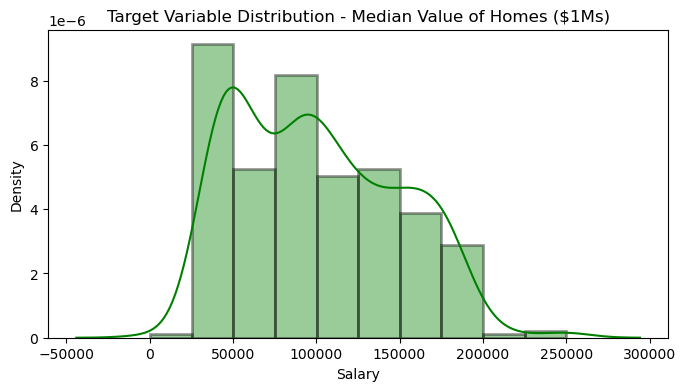


Inference: The Target Variable seems to be be normally distributed, averaging around 10 units.


In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

print('\n\033[1mInference:\033[0m The Target Variable seems to be be normally distributed, averaging around 10 units.')

                               Visualising Categorical Features:                                


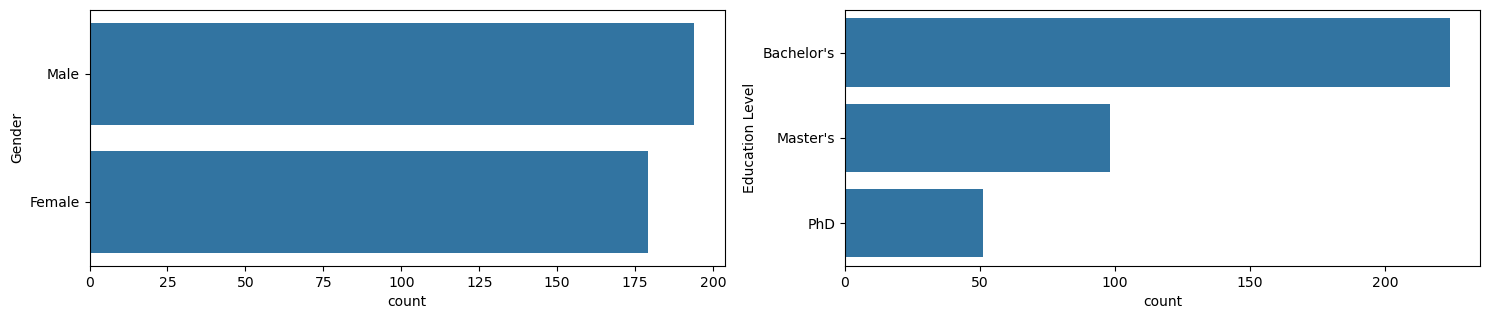

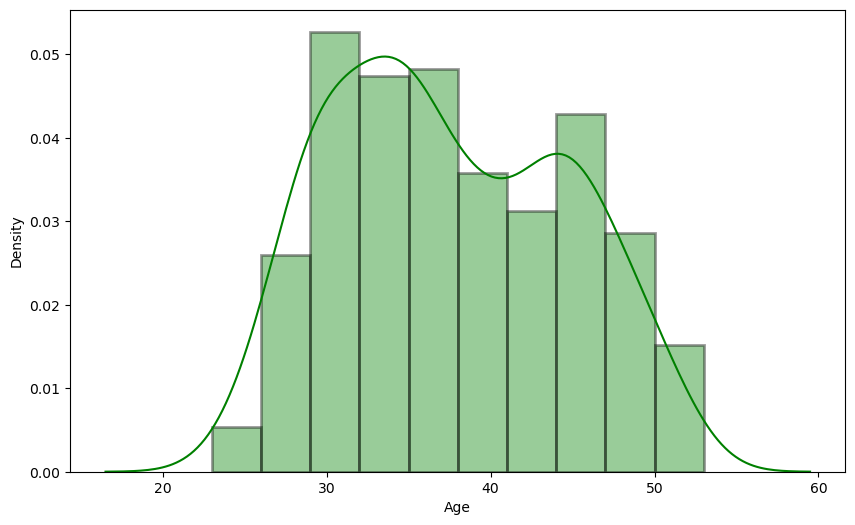

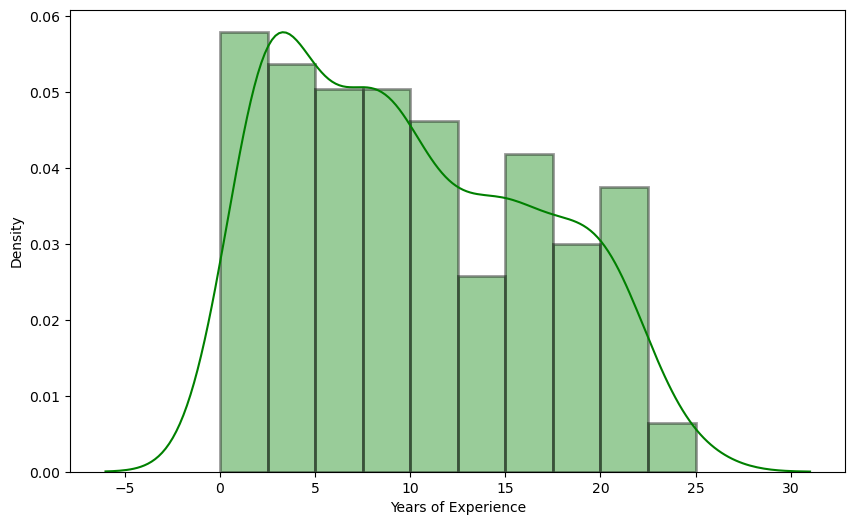


Inference: There are no categorical features in the dataset.


In [8]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)-1):
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.countplot(cf[i])

plt.tight_layout()
plt.show()

sns.distplot(df['Age'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.show()
sns.distplot(df['Years of Experience'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.show()

print('\n\033[1mInference:\033[0m There are no categorical features in the dataset.')

                                                Numeric Features Distribution                                                 


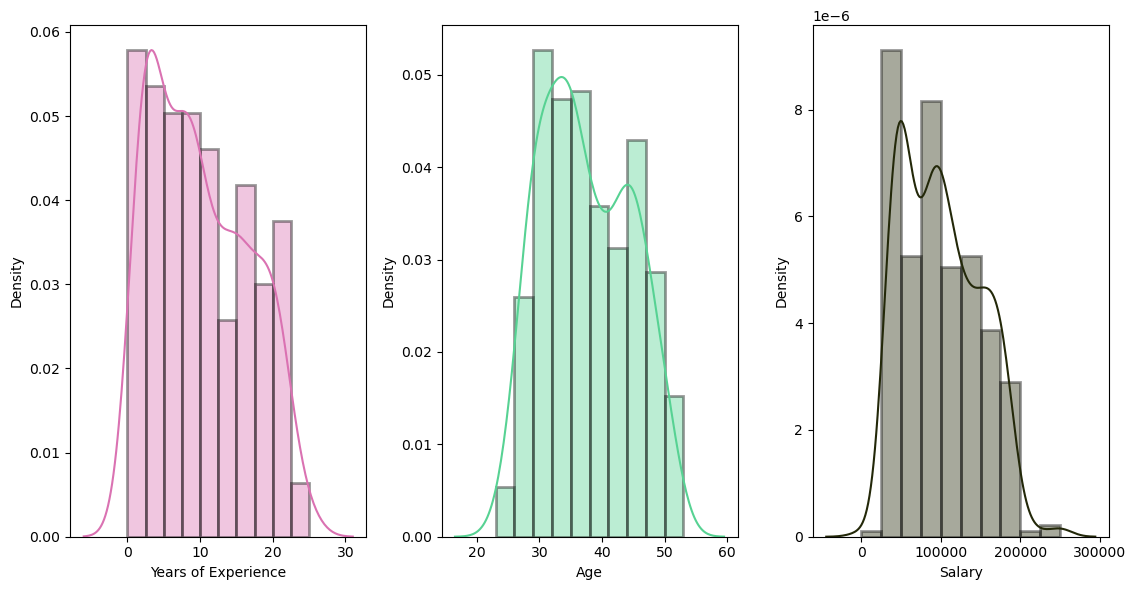

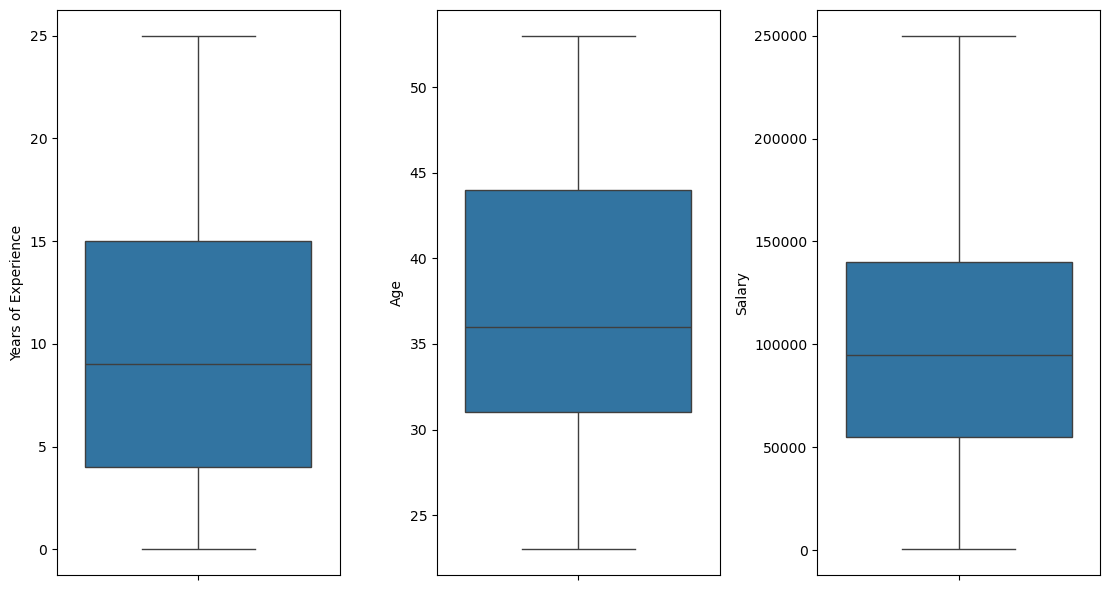


Inference: There is no outlier.


In [9]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(nf[i],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])

for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.boxplot(nf[i])
plt.tight_layout()
plt.show()

print('\n\033[1mInference:\033[0m There is no outlier.')

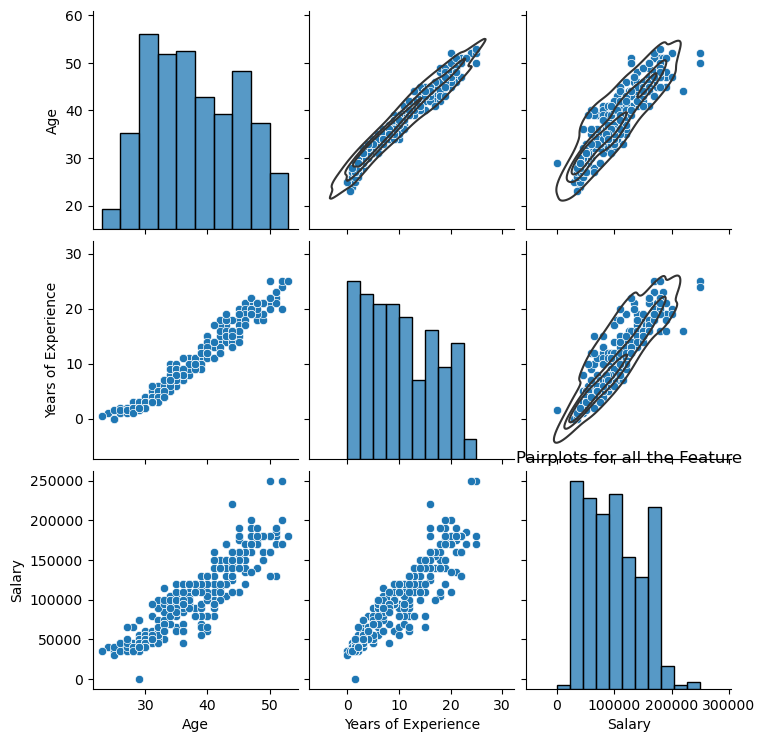


Inference: We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.


In [10]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

print('\n\033[1mInference:\033[0m We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.')

# 3. Data Preprocessing

In [11]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 50


In [12]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

print(f'\n\033[1mInference:\033 The dataset has 1 inconsistant value')

                     Total Null Values  Percentage
Age                                  1         0.3
Gender                               1         0.3
Education Level                      1         0.3
Job Title                            1         0.3
Years of Experience                  1         0.3
Salary                               1         0.3

Inference: The dataset has 1 inconsistant value


In [13]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values

#One-Hot Binay Encoding
oh=True
dm=True
for i in ['Gender', 'Education Level', 'Job Title']:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Gender

Dummy Encoding on features:
Education Level
Job Title


(325, 179)

In [14]:
#Removal of outlier:

df1 = df3.copy()

features1 = nf

for i in ['Years of Experience', 'Age','Salary']:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Age,Gender,Years of Experience,Salary,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,1,5.0,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,0,3.0,65000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,1,15.0,150000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,0,7.0,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,1,20.0,200000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 325 samples.
After removal of outliers, The dataset now has 324 samples.


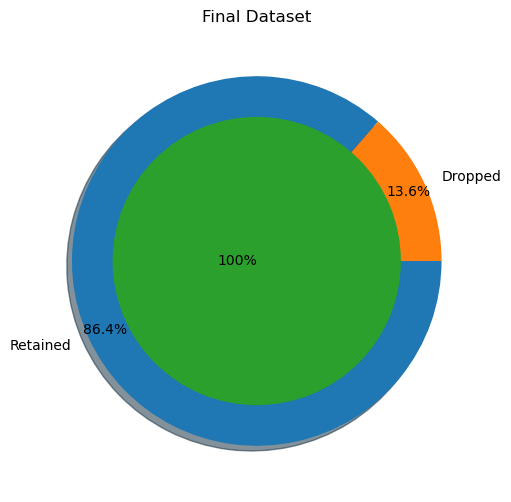


Inference: After the cleanup process, 51 samples were dropped, while retaining 13.6% of the data.


In [15]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 4. Data Manipulation

In [16]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (324, 178) (324,) 
Training set  --->  (259, 178) (259,) 
Testing set   --->  (65, 178)  (65,)


In [17]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Age,Gender,Years_of_Experience,Education_Level_Master's,Education_Level_PhD,Job_Title_Accountant,Job_Title_Administrative_Assistant,Job_Title_Business_Analyst,Job_Title_Business_Development_Manager,Job_Title_Business_Intelligence_Analyst,...,Job_Title_Supply_Chain_Manager,Job_Title_Technical_Recruiter,Job_Title_Technical_Support_Specialist,Job_Title_Technical_Writer,Job_Title_Training_Specialist,Job_Title_UX_Designer,Job_Title_UX_Researcher,Job_Title_VP_of_Finance,Job_Title_VP_of_Operations,Job_Title_Web_Developer
count,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,259.000000,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,...,2.590000e+02,259.0,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,259.0,2.590000e+02,2.590000e+02,2.590000e+02
mean,3.909357e-16,1.097363e-16,4.800964e-17,1.508875e-16,0.000000,-3.429260e-17,-2.057556e-17,-2.057556e-17,-2.743408e-17,-2.057556e-17,...,-2.743408e-17,0.0,-2.057556e-17,-2.743408e-17,-2.057556e-17,-3.429260e-17,0.0,-2.057556e-17,-2.057556e-17,-2.743408e-17
std,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,1.001936,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,...,1.001936e+00,0.0,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,0.0,1.001936e+00,1.001936e+00,1.001936e+00
min,-2.013219e+00,-1.043413e+00,-1.517967e+00,-5.966749e-01,-0.401790,-6.225728e-02,-6.225728e-02,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02
25%,-8.915761e-01,-1.043413e+00,-9.138126e-01,-5.966749e-01,-0.401790,-6.225728e-02,-6.225728e-02,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02
50%,-1.905494e-01,9.583937e-01,-1.586197e-01,-5.966749e-01,-0.401790,-6.225728e-02,-6.225728e-02,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02
75%,7.908881e-01,9.583937e-01,7.476119e-01,1.675955e+00,-0.401790,-6.225728e-02,-6.225728e-02,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.0,-6.225728e-02,-6.225728e-02,-6.225728e-02
max,2.192942e+00,9.583937e-01,2.257998e+00,1.675955e+00,2.488864,1.606238e+01,1.606238e+01,1.133578e+01,1.606238e+01,1.606238e+01,...,1.606238e+01,0.0,1.606238e+01,1.606238e+01,1.606238e+01,1.606238e+01,0.0,1.606238e+01,1.606238e+01,1.606238e+01



                                          Standardardization on Testing set                                          


,Age,Gender,Years_of_Experience,Education_Level_Master's,Education_Level_PhD,Job_Title_Accountant,Job_Title_Administrative_Assistant,Job_Title_Business_Analyst,Job_Title_Business_Development_Manager,Job_Title_Business_Intelligence_Analyst,...,Job_Title_Supply_Chain_Manager,Job_Title_Technical_Recruiter,Job_Title_Technical_Support_Specialist,Job_Title_Technical_Writer,Job_Title_Training_Specialist,Job_Title_UX_Designer,Job_Title_UX_Researcher,Job_Title_VP_of_Finance,Job_Title_VP_of_Operations,Job_Title_Web_Developer
count,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,...,6.500000e+01,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,6.500000e+01,6.500000e+01,6.500000e+01
mean,0.016523,0.034483,0.006361,0.207486,-0.134960,-6.225728e-02,0.185814,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.015385,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.015385,-6.225728e-02,-6.225728e-02,-6.225728e-02
std,1.037161,1.005704,1.022381,1.095142,0.843240,5.594315e-17,2.000015,2.797158e-17,5.594315e-17,4.895026e-17,...,4.895026e-17,0.124035,4.895026e-17,4.895026e-17,4.895026e-17,5.594315e-17,0.124035,4.895026e-17,4.895026e-17,5.594315e-17
min,-1.873014,-1.043413,-1.517967,-0.596675,-0.401790,-6.225728e-02,-0.062257,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02
25%,-0.751371,-1.043413,-0.913813,-0.596675,-0.401790,-6.225728e-02,-0.062257,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02
50%,-0.050344,0.958394,-0.158620,-0.596675,-0.401790,-6.225728e-02,-0.062257,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02
75%,0.931093,0.958394,0.898650,1.675955,-0.401790,-6.225728e-02,-0.062257,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,0.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02
max,1.912531,0.958394,1.955921,1.675955,2.488864,-6.225728e-02,16.062378,-8.821622e-02,-6.225728e-02,-6.225728e-02,...,-6.225728e-02,1.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02,-6.225728e-02,1.000000,-6.225728e-02,-6.225728e-02,-6.225728e-02
